<a href="https://colab.research.google.com/github/BernardoRMendes/Projeto/blob/main/analiseportfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
!pip install yahooquery
from yahooquery import Ticker
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Nesse projeto será analisado um portfólio do tipo "Smart Beta", apenas com ETF's setoriais dos Estados Unidos. O modelo considera o Momentum Relativo entre os setores e a volatilidade de cada ativo. Apenas sinais simples foram utilizados, sem qualquer otimização. A fórmula exata utilizada para chegar aos pesos de cada ETF não será revelada nesse estudo. O portfólio foi então comparado com os retornos de mercado e sua performance foi decomposta com o modelo de Carhart (Fama-French de 3 fatores + Momentum).**

**Lista de ETFs:**

**IYK: iShares U.S. Consumer Goods ETF**

**IYC: iShares U.S. Consumer Services ETF**

**IYE: iShares U.S. Energy ETF**

**IYF: iShares U.S. Financials ETF**

**IYH: iShares U.S. Healthcare ETF**

**IYJ: iShares U.S. Industrials ETF**

**IYM: iShares U.S. Basic Materials ETF**

**IYW: iShares U.S. Technology ETF**

**IYZ: iShares U.S. Telecommunications ETF**

**IDU: iShares U.S. Utilities ETF**




**Observamos que o modelo proposto foi capaz de gerar retornos levemente superiores ao Mercado, com menor volatilidade, resultando em maior Sharpe e Calmar Ratio. À primeira vista, pode parecer irrelevante a adição de valor, mas cabe ressaltar que o Portfólio foi construído apenas com ETFs setoriais de Large Caps, gerando um portfólio menos concentrado do que o portfólio de Mercado (extremamente concentrado no setor de Tecnologia).**

**Caso os pesos fossem inicializados aleatoriamente, poderíamos observar que a maior parte dos portfólios formados com esses ETF's ficariam atrás do portfólio de Mercado, tanto em retornos absolutos como se ajustados ao risco. Isso é mais uma evidência de que o método para definição de pesos gerou algum valor.**

**De acordo com a decomposição dos retornos em fatores, o Portfólio não gerou alpha efetivamente (considerando nível de significância de 5%).**



**Apesar disso, obteve retornos de mercado com beta de 0,8809. O Portfólio apresentou (com significância estatística) exposição negativa às Small Caps (SMB com coeficiente negativo), HML com coeficiente positivo (mostrando que nesse período o portfólio teve viés em ações consideradas de crescimento) e viés positivo de momentum (já esperado de acordo com a própria construção do modelo).**

**Por fim, foram plotados os valores dos coeficientes em janelas móveis de 90 dias.**

In [2]:
url="https://raw.githubusercontent.com/BernardoRMendes/Projeto/main/analiseportfolio.xlsx"

In [3]:
dataframe8=pd.read_excel(url,index_col=0)

In [4]:
dataframe8

,Port_IYK,Port_IYC,Port_IYE,Port_IYF,Port_IYH,Port_IYJ,Port_IYM,Port_IYW,Port_IYZ,Port_IDU,Portfolio_Retorno
date,,,,,,,,,,,
2014-01-29,-0.001577,-0.002856,-0.000363,-0.000730,-0.001175,-0.001219,0.000424,-0.001172,-0.001030,0.0,-0.009698
2014-01-30,0.000547,0.002513,0.000071,0.000850,0.002291,0.001169,0.000590,0.002115,0.000493,0.0,0.010638
2014-01-31,-0.000558,-0.001421,-0.000842,-0.000810,-0.001100,-0.000886,-0.000587,0.000690,-0.000287,0.0,-0.005804
2014-02-03,-0.001864,-0.004113,-0.001343,-0.001676,-0.003171,-0.004274,-0.002939,-0.003084,-0.002621,0.0,-0.025085
2014-02-04,0.000722,0.001574,0.000577,0.000696,0.001582,0.001161,0.001015,0.000786,0.000648,0.0,0.008760
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-06,0.000686,0.000000,0.000213,0.002262,-0.000005,0.001174,0.000641,0.000230,0.001571,0.0,0.006772
2021-05-07,0.000888,0.001761,0.001303,0.001541,0.000459,0.001642,0.000771,0.000351,0.000396,0.0,0.009112
2021-05-10,-0.000885,-0.001043,-0.000132,-0.000884,-0.000211,-0.000895,-0.000386,-0.000771,0.000234,0.0,-0.004972


In [5]:
dataframe8['Portfolio']=100*(1+dataframe8["Portfolio_Retorno"]).cumprod()

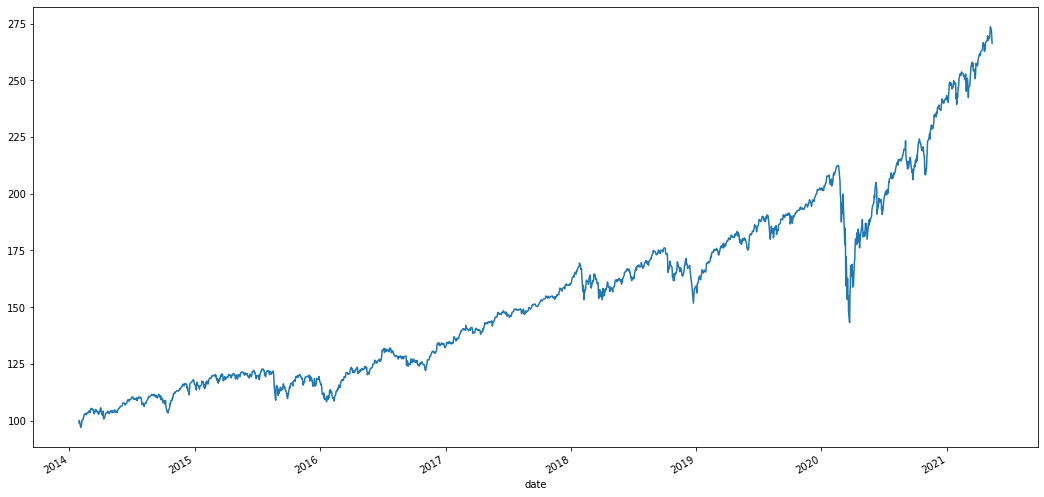

In [6]:
dataframe8['Portfolio'].plot(figsize=(18,9))

In [7]:
ff_dict = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', 
                         start='2014-01-28', end='2021-05-11')
ff_dict2= web.DataReader('F-F_Momentum_Factor_daily', 'famafrench', 
                         start='2014-01-28', end='2021-05-11')

In [8]:
ff_dict[0].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2014-01-28,0.73,0.16,0.05,0.0
2014-01-29,-1.07,-0.40,0.23,0.0
2014-01-30,1.22,0.30,-0.38,0.0
2014-01-31,-0.66,-0.08,-0.32,0.0
2014-02-03,-2.49,-0.87,0.27,0.0


In [9]:
ff_dict=pd.DataFrame(ff_dict[0])
ff_dict2=pd.DataFrame(ff_dict2[0])
ff_dict=ff_dict.join(ff_dict2)
ff_dict

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2014-01-28,0.73,0.16,0.05,0.0,0.84
2014-01-29,-1.07,-0.40,0.23,0.0,-0.52
2014-01-30,1.22,0.30,-0.38,0.0,1.26
2014-01-31,-0.66,-0.08,-0.32,0.0,0.11
2014-02-03,-2.49,-0.87,0.27,0.0,-0.85
...,...,...,...,...,...
2021-03-25,0.67,1.63,1.37,0.0,0.75
2021-03-26,1.55,0.20,0.65,0.0,-0.47
2021-03-29,-0.49,-2.39,-0.21,0.0,-2.75


In [10]:
ff_data = ff_dict.join(dataframe8["Portfolio_Retorno"]*100)
ff_data.dropna(inplace=True)

In [11]:
ff_data

,Mkt-RF,SMB,HML,RF,Mom,Portfolio_Retorno
Date,,,,,,
2014-01-29,-1.07,-0.40,0.23,0.0,-0.52,-0.969788
2014-01-30,1.22,0.30,-0.38,0.0,1.26,1.063765
2014-01-31,-0.66,-0.08,-0.32,0.0,0.11,-0.580383
2014-02-03,-2.49,-0.87,0.27,0.0,-0.85,-2.508474
2014-02-04,0.77,-0.04,-0.05,0.0,0.46,0.875971
...,...,...,...,...,...,...
2021-03-25,0.67,1.63,1.37,0.0,0.75,0.994981
2021-03-26,1.55,0.20,0.65,0.0,-0.47,1.692289
2021-03-29,-0.49,-2.39,-0.21,0.0,-2.75,-0.406745


In [12]:
df=ff_data[['Portfolio_Retorno','Mkt-RF']]/100

In [13]:
df

,Portfolio_Retorno,Mkt-RF
Date,,
2014-01-29,-0.009698,-0.0107
2014-01-30,0.010638,0.0122
2014-01-31,-0.005804,-0.0066
2014-02-03,-0.025085,-0.0249
2014-02-04,0.008760,0.0077
...,...,...
2021-03-25,0.009950,0.0067
2021-03-26,0.016923,0.0155
2021-03-29,-0.004067,-0.0049


In [14]:
df['Portfolio']=100*(1+df['Portfolio_Retorno']).cumprod()
df['Mercado']=100*(1+df['Mkt-RF']).cumprod()

In [15]:
df

,Portfolio_Retorno,Mkt-RF,Portfolio,Mercado
Date,,,,
2014-01-29,-0.009698,-0.0107,99.030212,98.930000
2014-01-30,0.010638,0.0122,100.083661,100.136946
2014-01-31,-0.005804,-0.0066,99.502792,99.476042
2014-02-03,-0.025085,-0.0249,97.006790,96.999089
2014-02-04,0.008760,0.0077,97.856542,97.745982
...,...,...,...,...
2021-03-25,0.009950,0.0067,253.228058,242.830420
2021-03-26,0.016923,0.0155,257.513408,246.594292
2021-03-29,-0.004067,-0.0049,256.465984,245.385980


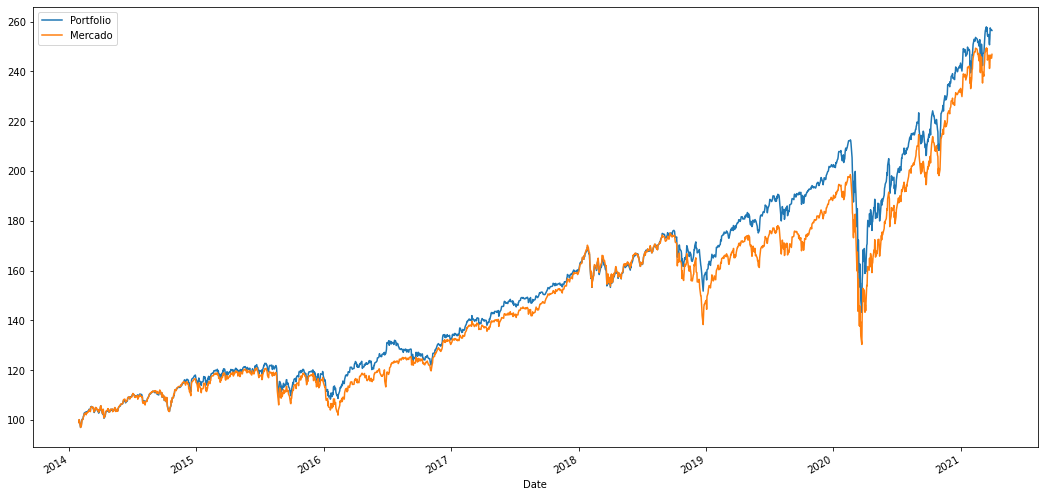

In [16]:
df[['Portfolio','Mercado']].plot(figsize=(18,9))

In [17]:
def annualize_rets(r, periods_per_year):
    """
    Retorno Anualizado
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


def annualize_vol(r, periods_per_year):
    """
    Volatilidade dos retornos em formato anualizado
    """
    return r.std()*(periods_per_year**0.5)


def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Calcula o Sharpe anualizado
    """
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


def drawdown(return_series: pd.Series):
    """Recebe uma série de retornos e
       retorna um dataframe com o valor acumulado,
       picos prévios, e o drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [18]:
Portfolio=dict()
Portfolio["Retorno Anualizado"]=annualize_rets(df['Portfolio_Retorno'],252)*100
Portfolio["Volatilidade Anualizada"]=annualize_vol(df['Portfolio_Retorno'],252)*100
Portfolio["Sharpe Ratio"]=sharpe_ratio(df['Portfolio_Retorno'],0,252)
Portfolio["Max Drawdown"]=drawdown(df['Portfolio_Retorno']).Drawdown.min()*100
Portfolio["Calmar Ratio"]=abs(Portfolio["Retorno Anualizado"]/Portfolio["Max Drawdown"])
Portfolio=pd.DataFrame.from_dict(Portfolio.items())
Portfolio=Portfolio.set_index(0)
Portfolio.index.name=None
Portfolio.columns=["Portfolio"]
Mercado=dict()
Mercado["Retorno Anualizado"]=annualize_rets(df['Mkt-RF'],252)*100
Mercado["Volatilidade Anualizada"]=annualize_vol(df['Mkt-RF'],252)*100
Mercado["Sharpe Ratio"]=sharpe_ratio(df['Mkt-RF'],0,252)
Mercado["Max Drawdown"]=drawdown(df['Mkt-RF']).Drawdown.min()*100
Mercado["Calmar Ratio"]=abs(Mercado["Retorno Anualizado"]/Mercado["Max Drawdown"])
Mercado=pd.DataFrame.from_dict(Mercado.items())
Mercado=Mercado.set_index(0)
Mercado.index.name=None
Mercado.columns=["Mercado"]
portfolio=pd.concat([Mercado,Portfolio],axis=1)

In [19]:
portfolio

,Mercado,Portfolio
Retorno Anualizado,13.439968,14.047782
Volatilidade Anualizada,18.055405,16.446098
Sharpe Ratio,0.744374,0.854171
Max Drawdown,-34.360767,-32.601774
Calmar Ratio,0.391143,0.430890


In [20]:
modelo=ff_data/100

In [21]:
modelo.dropna(inplace=True)

In [22]:
modelo=modelo.rename(columns={"Mkt-RF": "mkt", 'Mom   ':'Mom'})

In [23]:
modelo

,mkt,SMB,HML,RF,Mom,Portfolio_Retorno
Date,,,,,,
2014-01-29,-0.0107,-0.0040,0.0023,0.0,-0.0052,-0.009698
2014-01-30,0.0122,0.0030,-0.0038,0.0,0.0126,0.010638
2014-01-31,-0.0066,-0.0008,-0.0032,0.0,0.0011,-0.005804
2014-02-03,-0.0249,-0.0087,0.0027,0.0,-0.0085,-0.025085
2014-02-04,0.0077,-0.0004,-0.0005,0.0,0.0046,0.008760
...,...,...,...,...,...,...
2021-03-25,0.0067,0.0163,0.0137,0.0,0.0075,0.009950
2021-03-26,0.0155,0.0020,0.0065,0.0,-0.0047,0.016923
2021-03-29,-0.0049,-0.0239,-0.0021,0.0,-0.0275,-0.004067


In [24]:
ff_model = smf.ols(formula="Portfolio_Retorno ~ mkt+SMB+HML+Mom", 
                   data=modelo).fit()
 
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Portfolio_Retorno   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     6730.
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        17:27:24   Log-Likelihood:                 8191.6
No. Observations:                1806   AIC:                        -1.637e+04
Df Residuals:                    1801   BIC:                        -1.635e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   6.12e-05      1.664      0.0

In [25]:
def rolling_factor_model(input_data, formula, window_size):
    '''
    Função para estimar a exposição aos fatores em janelas móveis de tempo.
    
    Parâmetros
    ------------
    input_data : pd.DataFrame
         DataFrame contendo os fatores e os retornos do portfólio
    formula : str
        `statsmodels` fórmula representando a regressão linear  
    window_size : int
        Comprimento da janela móvel.
    
    Retorna
    -----------
    coeffs_df : pd.DataFrame
        DataFrame contendo o intercepto e os fatores para cada iteração
    '''

    coeffs = []

    for start_index in range(len(input_data) - window_size + 1):        
        end_index = start_index + window_size

        # Define e faz o fit do modelo
        ff_model = smf.ols(
            formula=formula, 
            data=input_data[start_index:end_index]
        ).fit()
   
        # Armazena os coeficientes
        coeffs.append(ff_model.params)
    
    coeffs_df = pd.DataFrame(
        coeffs, 
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df

**Calculando o Valor dos coeficientes para janelas móveis de 90 dias:**

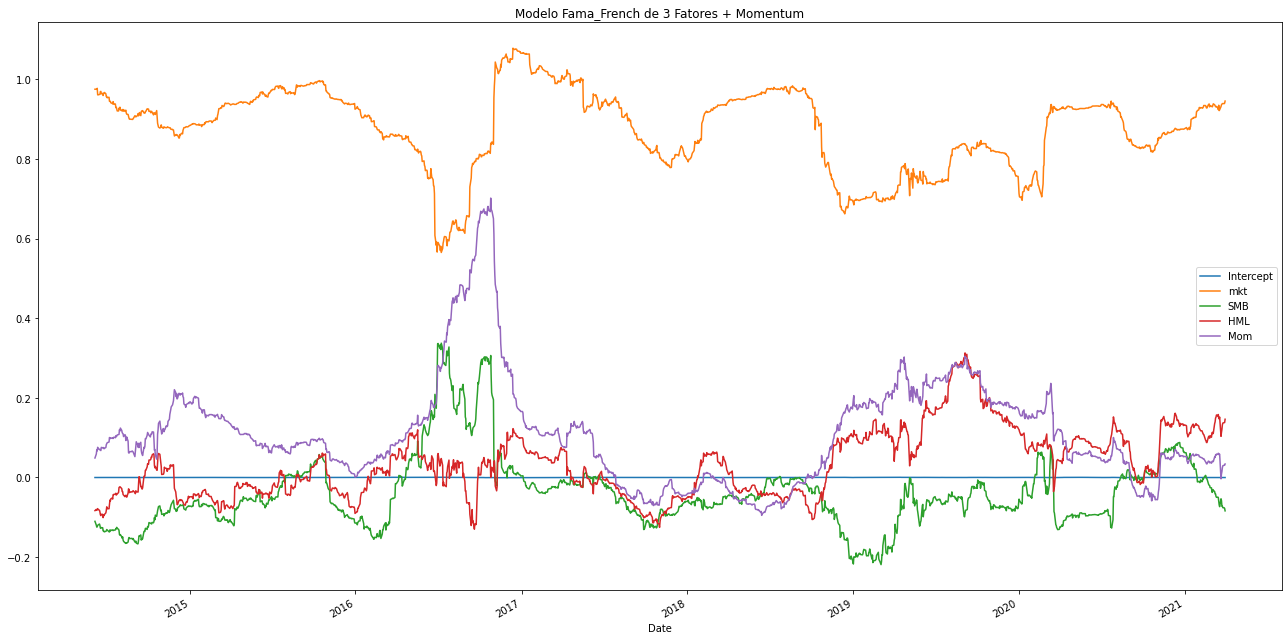

In [26]:
formula = "Portfolio_Retorno ~ mkt+SMB+HML+Mom"
results_df = rolling_factor_model(modelo, 
                                  formula, 
                                  window_size=90)
results_df.plot(title = 'Modelo Fama_French de 3 Fatores + Momentum',figsize=(18,9))

plt.tight_layout()
plt.show()